In [31]:
import lec3_graphs as gfx
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# importamos la triada de Data Science
# importamos scipy.stats que ayudará a generar distribuciones
# archivos con funciones de visualización
plt.style.use('seaborn-whitegrid')  # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6)  # Tamaño gráficos


In [32]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

(194, 1882)

In [33]:
df['undp_hdi'].describe().round(3)


count    186.000
mean       0.696
std        0.155
min        0.347
25%        0.567
50%        0.726
75%        0.805
max        0.948
Name: undp_hdi, dtype: float64

In [34]:
# Generamos una nueva columna que devuelve un booleano si es que la observación no está presente
df['flagnull'] = df['undp_hdi'].isnull()
# dentro de cada fila de nuestra base
for i, r in df.iterrows():
    # si flagnull es verdadero
    if r['flagnull'] is True:
        # imprime el nombre
        print(r['cname'])
# Obs: Hay una forma menos 'memory hungry' de hacer esto con el metodo 'loc' que veremos mas adelante:
df.loc[df['undp_hdi'].isnull()]['cname'].unique()


Taiwan
Korea, North
Monaco
Nauru
Marshall Islands
San Marino
Somalia
Tuvalu


array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)

Text(0.5, 1.0, 'Distribución empírica del índice de la variable undp_hdi')

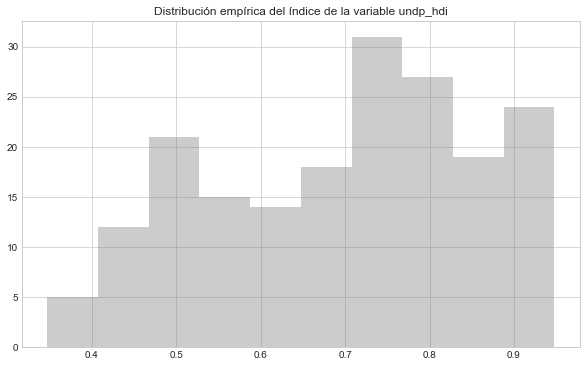

In [35]:
# vamos a eliminar los datos perdidos en la columna undp_hdi con dropna()
hdi_dropna = df['undp_hdi'].dropna()
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.title("Distribución empírica del índice de la variable undp_hdi")


In [36]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region']]
hdi_group.shape


(194, 4)

In [37]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem', 'EastAsia', 'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])


In [38]:
print("La media del índice de desarrollo humano para nuestra muestra es de : ",round(hdi_group['undp_hdi'].mean(),2))

La media del índice de desarrollo humano para nuestra muestra es de :  0.7


In [39]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

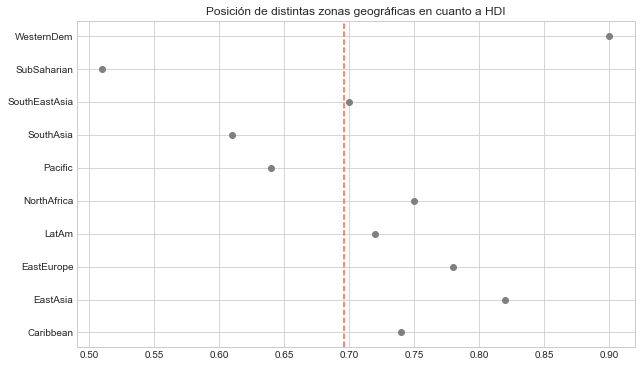

In [40]:
plt.title('Posición de distintas zonas geográficas en cuanto a HDI')
plt.plot(group_mean.values, group_mean.index, 'o', color = 'grey')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--');


Text(0.5, 1.0, 'Histograma de la variable HDI')

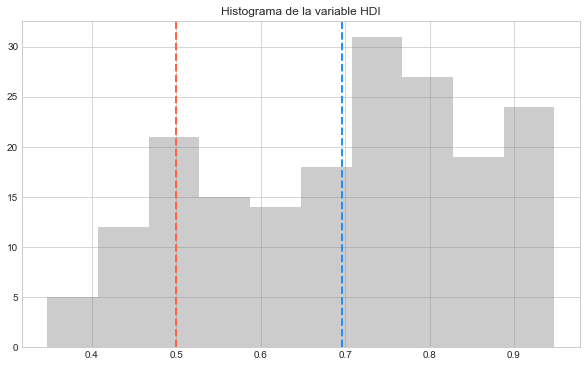

In [41]:
#guardemos la media en un objeto
hdi_mean = hdi_dropna.mean()
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.axvline(hdi_mean, color='dodgerblue', linestyle='--', lw=2)
plt.axvline(0.5, color='tomato', linestyle='--', lw=2)
plt.title('Histograma de la variable HDI')


In [42]:
print("La media es: ", round(hdi_dropna.mean(), 3))
print("La varianza es: ", round(np.var(hdi_dropna), 3))

La media es:  0.696
La varianza es:  0.024


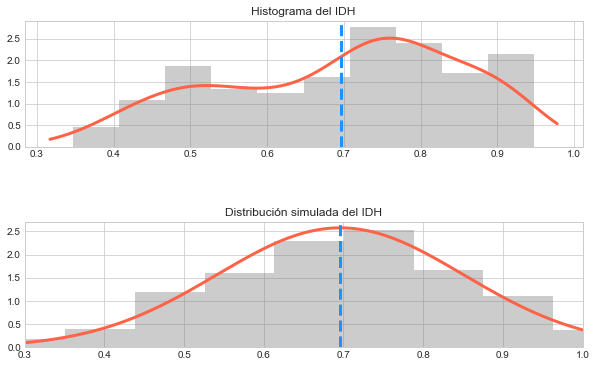

In [44]:
# Con plt.subplot vamos a dividir el espacio del en dos partes
plt.subplot(2, 1, 1)
# Graficamos el mismo histograma, especificando Normed para que el histograma representa densidades y no frecuencias
plt.hist(hdi_dropna, color='grey', alpha=.4, density=True)
# extraemos los límites del histograma 
x_min, x_max = plt.xlim()
# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)
# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)    
gauss_kde=stats.gaussian_kde(hdi_dropna)  # Kernel gaussiano
Z=np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color = 'tomato', lw = 3)
# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color = 'dodgerblue', linestyle = '--', lw = 3)
plt.title("Histograma del IDH")
# El segundo gráfico
plt.subplot(2, 1, 2)
# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color = 'grey', alpha = .4, density = True)
# Fijamos los límites del eje x
plt.xlim(0.3, 1)
# Generamos una lista entre
x_axis=np.linspace(.3, 1, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis, 0.696, np.sqrt(0.024)), color = 'tomato', lw = 3)
plt.axvline(0.696, color = 'dodgerblue', linestyle = '--', lw = 3)
plt.title("Distribución simulada del IDH")
plt.subplots_adjust(hspace = 0.6)


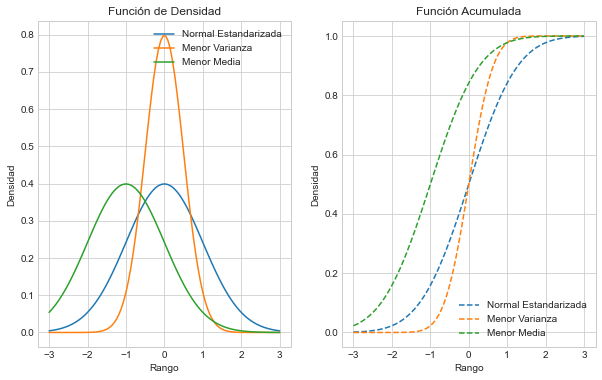

In [45]:
gfx.normal_distributions()


In [46]:
# Generamos la normalización del gdp mediante el logaritmo.
gdp_dropna = df['gle_cgdpc'].dropna()
log_gdp = np.log(gdp_dropna)
print(round(log_gdp.mean(), 2))


8.85


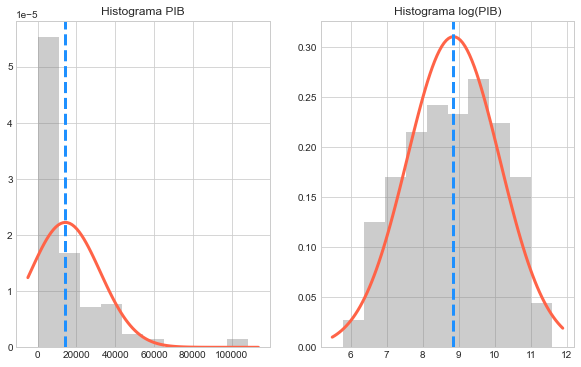

In [48]:
plt.subplot(1, 2, 1)
plt.hist(gdp_dropna, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,gdp_dropna.mean(),gdp_dropna.std()),color='tomato', lw=3)
plt.axvline(gdp_dropna.mean(),color='dodgerblue',linestyle='--', lw=3)
plt.title("Histograma PIB")
plt.subplot(1, 2, 2)
plt.hist(log_gdp, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis,log_gdp.mean(),log_gdp.std()),color='tomato', lw=3)
plt.axvline(log_gdp.mean(),color='dodgerblue',linestyle='--', lw=3)
plt.title("Histograma log(PIB)");


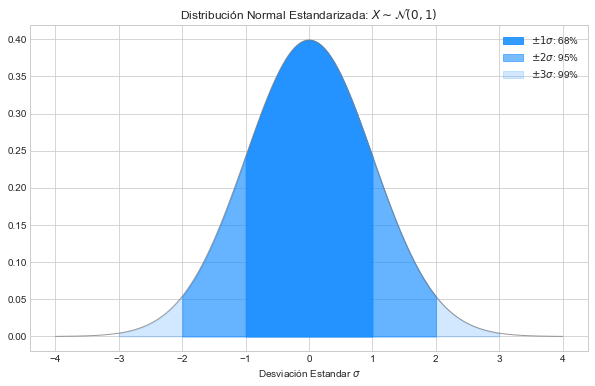

In [50]:
gfx.normal_distribution_sigma()

In [52]:
chile = df[df['cname'] == 'Chile']
chile['undp_hdi']


35    0.845
Name: undp_hdi, dtype: float64

In [53]:
hdi_chile = df[df['cname']=='Chile']['undp_hdi']
print('hdi Chile: %.3f' %hdi_chile)
print('hdi medio a nivel mundial: %.3f' %round(hdi_dropna.mean(),3))

hdi Chile: 0.845
hdi medio a nivel mundial: 0.696


In [54]:
print('Puntaje Z para Chile: %.2f' %((hdi_chile - hdi_dropna.mean()) / np.sqrt(hdi_dropna.var())))


Puntaje Z para Chile: 0.96


In [55]:
def get_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    return (get_point - get_mean) / get_std


get_zscore('undp_hdi', 'Chile')


35    0.960783
Name: undp_hdi, dtype: float64

In [56]:
get_zscore('undp_hdi', 'Namibia')


118   -0.378656
Name: undp_hdi, dtype: float64

In [57]:
get_zscore('undp_hdi', 'Uruguay')


188    0.632363
Name: undp_hdi, dtype: float64

In [58]:
get_zscore('undp_hdi', 'China')

36    0.245986
Name: undp_hdi, dtype: float64

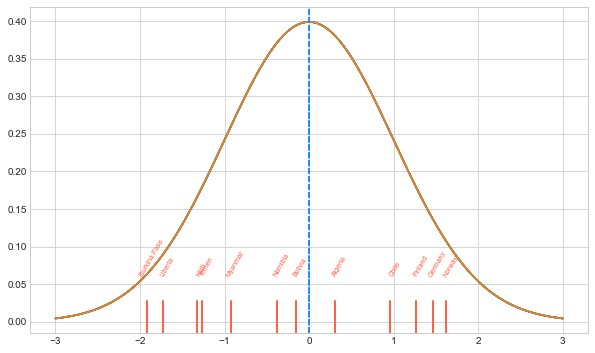

In [59]:
# definamos la función
def point_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(hdi_dropna.var())
    get_zscore = float((get_point - get_mean) / get_std)
    plt.axvline(get_zscore, ymin = 0, ymax = .1, color='tomato', lw=2)
    plt.annotate(case, xy=(get_zscore + .05, 0.06),
    color='tomato', rotation=60, ha='center', size = 7)
    # generamos un array lineal
    x_axis = np.linspace(-3, 3, 200)
    # simulamos la función de densidad
    plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1))
    # marcamos la media en 0
    plt.axvline(0, color='dodgerblue', linestyle='--')
    # Pasamos un array de casos a visualizar en un loop.
    # donde para cada elemento de éste array

for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar',
    'Germany', 'Norway', 'Finland', 'Yemen', 'Bolivia',
    'Algeria', 'Namibia', 'Liberia']:
    # aplicaremos la función point_zscore
    point_zscore('undp_hdi', i)

In [61]:
# Proporciones de cada tipo de gobierno en el dataset
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount


Democracia       0.65
No Democracia    0.35
Name: democracies, dtype: float64

In [62]:
# Conteo de tipos de gobierno en el dataset
df['democracies'].value_counts()


Democracia       127
No Democracia     67
Name: democracies, dtype: int64

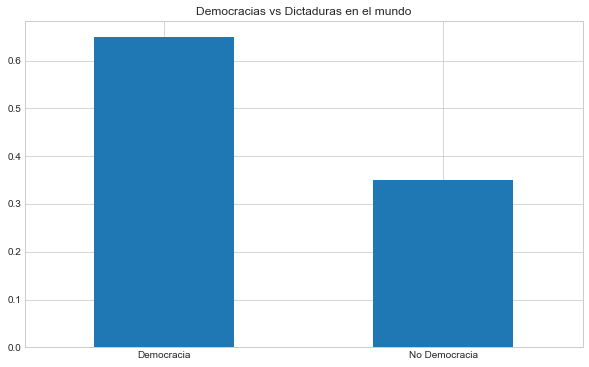

In [63]:
democount.plot(kind='bar')
plt.title("Democracias vs Dictaduras en el mundo")
plt.xticks(rotation='horizontal')


In [64]:
mu, sigma = stats.bernoulli.stats(.65)
print("La media del ensayo de Bernoulli es de: ", mu.round(2))
print("La varianza del ensayo de Bernoulli es de: ", sigma.round(2))
print("La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre :", round(mu - sigma, 2), round(mu + sigma, 2))

La media del ensayo de Bernoulli es de:  0.65
La varianza del ensayo de Bernoulli es de:  0.23
La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre : 0.42 0.88


In [67]:
prob_dem = stats.binom(len(df), .654)
mu, sigma = prob_dem.stats()
print("Con", len(df), "países y una probabilidad de .654, esperamos que", mu, " países tengan regímenes democráticos.")


Con 194 países y una probabilidad de .654, esperamos que 126.876  países tengan regímenes democráticos.


Text(0, 0.5, 'Densidad')

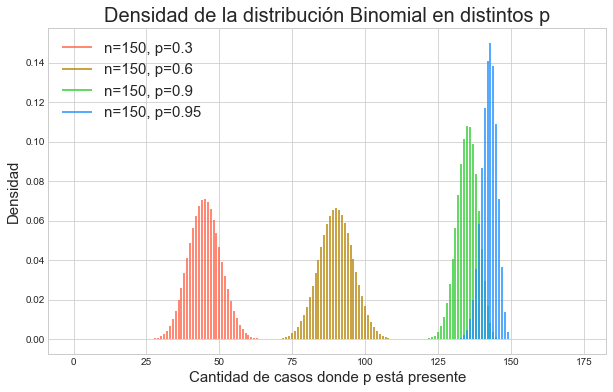

In [68]:
# generamos una lista con cuatro colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]
# iniciamos un loop para índices y valores
for i, prob in enumerate([.3, .6, .9, .95]):
    # generamos un arreglo con numpy de 175
    x_axis = np.arange(175)
    # para cada valor de nuestro array graficamos la probabilidad
    plt.vlines(x_axis, 0, stats.binom(150, prob).pmf(x_axis),
            # y asignamos un color en específico
            colors=colors[i], label="n=150, p={}".format(prob))
plt.legend(loc=2, fontsize=15)
plt.title("Densidad de la distribución Binomial en distintos p", size=20)
plt.xlabel('Cantidad de casos donde p está presente', size=15)
plt.ylabel('Densidad', size=15)


Text(0, 0.5, 'Densidad')

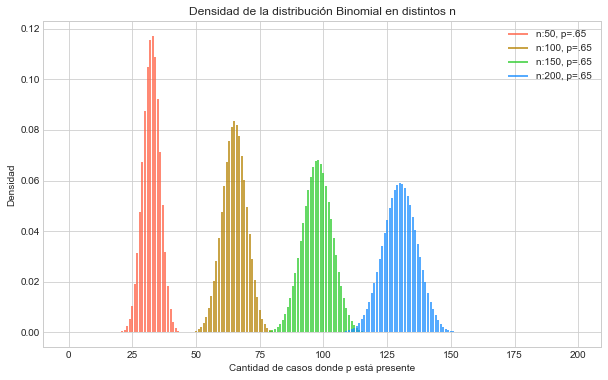

In [70]:
# generamos una lista de colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]
# iniciamos un loop para índices y valores
for i, n_size in enumerate([50, 100, 150, 200]):
    # generamos un arreglo con numpy de 200
    x_axis = np.arange(200)
    # para cada valor de nuestro array graficamos la probabilidad condicional al tamaño
    plt.vlines(x_axis, 0, stats.binom(n_size, .65).pmf(x_axis), colors=colors[i], label=r'n:{0}, p=.65'.format(n_size))
plt.legend()
plt.title("Densidad de la distribución Binomial en distintos n")
plt.xlabel("Cantidad de casos donde p está presente")
plt.ylabel('Densidad')


In [71]:
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia','Dictadura')
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount

Democracia    0.65
Dictadura     0.35
Name: democracies, dtype: float64

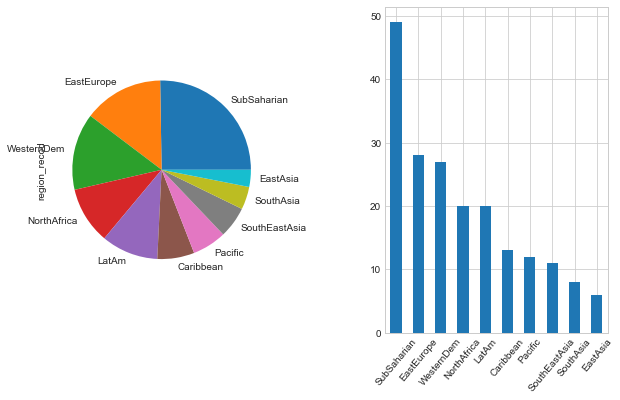

In [72]:
plt.subplot(1, 2, 1)
hdi_group.region_recod.value_counts().plot(kind='pie')
plt.subplot(1, 2, 2)
hdi_group.region_recod.value_counts().plot(kind='bar')
plt.subplots_adjust(wspace=0.5)
plt.xticks(rotation=50)


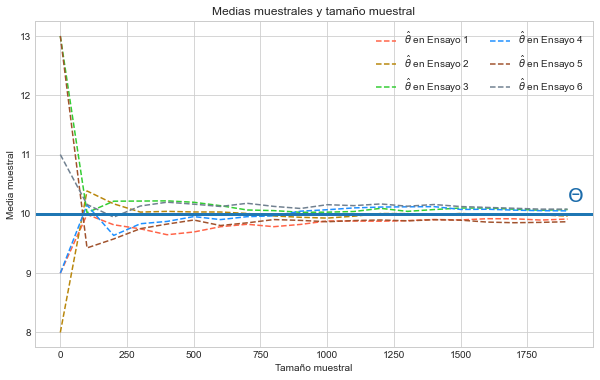

In [74]:
gfx.law_large_numbers()
plt.legend(loc='best', ncol=2)


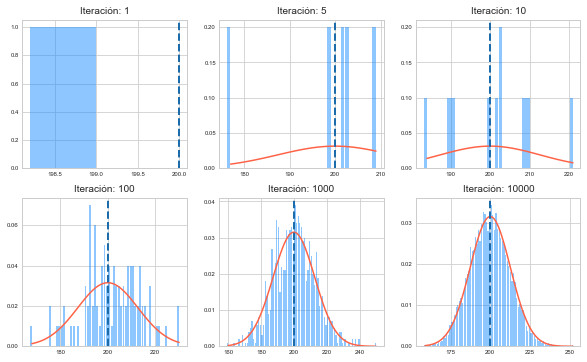

In [75]:
gfx.central_limit_theorem()

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

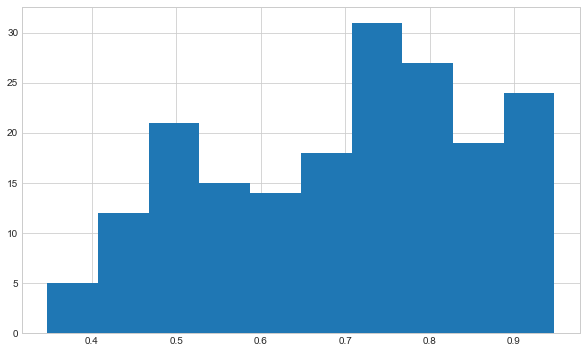

In [76]:
plt.hist(df['undp_hdi'])


(array([  6.,  44.,  94., 206., 267., 204., 106.,  57.,  13.,   3.]),
 array([-4.60627816, -2.52531136, -0.44434455,  1.63662226,  3.71758906,
         5.79855587,  7.87952268,  9.96048948, 12.04145629, 14.1224231 ,
        16.2033899 ]),
 <BarContainer object of 10 artists>)

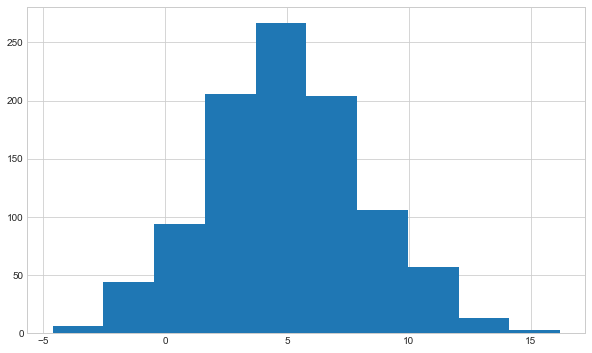

In [80]:
plt.hist(np.random.normal(5, np.sqrt(10), 1000))


(array([  6.,  37., 123., 227., 276., 219.,  76.,  34.,   1.,   1.]),
 array([-12.41244319,  -8.87688313,  -5.34132307,  -1.80576301,
          1.72979705,   5.26535711,   8.80091717,  12.33647724,
         15.8720373 ,  19.40759736,  22.94315742]),
 <BarContainer object of 10 artists>)

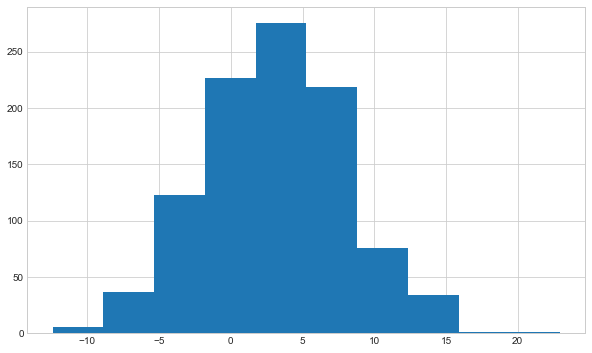

In [81]:
plt.hist(np.random.normal(np.sqrt(10),5, 1000))